Enter the x-coordinate of the seed point:  0.5
Enter the y-coordinate of the seed point:  0


Valid seed point entered.


Enter the number of steps:  50000


Number of steps set to 50000.


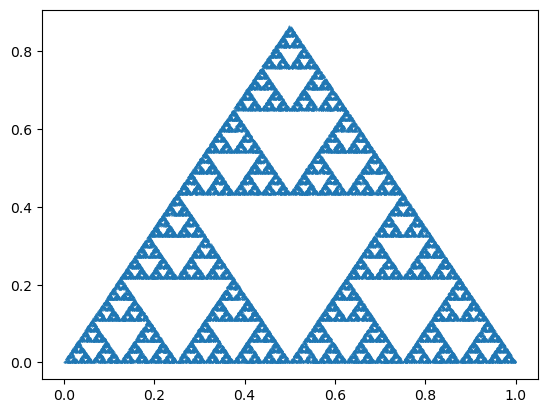

[(0.5, 0.0), (0.5, 0.433), (0.25, 0.2165), (0.375, 0.54125), (0.4375, 0.703625), (0.71875, 0.3518125), (0.609375, 0.60890625), (0.8046875, 0.304453125), (0.40234375, 0.1522265625), (0.201171875, 0.07611328125), (0.1005859375, 0.038056640625), (0.05029296875, 0.0190283203125), (0.525146484375, 0.00951416015625), (0.5125732421875, 0.43775708007812497), (0.50628662109375, 0.6518785400390625), (0.253143310546875, 0.32593927001953127), (0.1265716552734375, 0.16296963500976563), (0.5632858276367188, 0.08148481750488282), (0.5316429138183594, 0.4737424087524414), (0.7658214569091797, 0.2368712043762207), (0.8829107284545898, 0.11843560218811035), (0.4414553642272949, 0.059217801094055174), (0.47072768211364746, 0.4626089005470276), (0.7353638410568237, 0.2313044502735138), (0.6176819205284119, 0.5486522251367569), (0.8088409602642059, 0.27432611256837847), (0.654420480132103, 0.5701630562841893), (0.3272102400660515, 0.28508152814209464), (0.6636051200330257, 0.14254076407104732), (0.58180256

In [1]:
import matplotlib.pyplot as plt
import random

# Vertices of an equilateral triangle
vertices = [(0, 0), (1, 0), (0.5, 0.866)]

# Function to check if a point (x, y) is inside the triangle
def is_inside(x, y):
    # Compute areas of triangle formed by each vertex and the test point
    A = lambda x1, y1, x2, y2, x3, y3: abs((x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2)) / 2.0)
    A1 = A(vertices[0][0], vertices[0][1], vertices[1][0], vertices[1][1], x, y)
    A2 = A(vertices[1][0], vertices[1][1], vertices[2][0], vertices[2][1], x, y)
    A3 = A(vertices[2][0], vertices[2][1], vertices[0][0], vertices[0][1], x, y)
    # If the sum of these areas is equal to the area of the triangle, the point is inside
    return A1 + A2 + A3 == A(vertices[0][0], vertices[0][1], vertices[1][0], vertices[1][1], vertices[2][0], vertices[2][1])

# Prompting the user for a seed point
while True:
    try:
        seed_x = float(input("Enter the x-coordinate of the seed point: "))
        seed_y = float(input("Enter the y-coordinate of the seed point: "))
        if is_inside(seed_x, seed_y):
            print("Valid seed point entered.")
            break
        else:
            print("The point is not inside the triangle. Please try again.")
    except ValueError:
        print("Invalid input. Please enter numerical values.")

seed = (seed_x, seed_y)
points = [seed]

# Prompting the user for the number of steps
while True:
    try:
        num_steps = int(input("Enter the number of steps: "))
        if num_steps > 0:
            print(f"Number of steps set to {num_steps}.")
            break
        else:
            print("Please enter a positive integer.")
    except ValueError:
        print("Invalid input. Please enter a positive integer.")

# Generating points using the Chaos Game algorithm
for _ in range(num_steps):
    # Choose a random vertex to move toward
    next_vertex = random.choice(vertices)
    # Create the next point by moving from the last point to the midpoint
    next_point = ((points[-1][0] + next_vertex[0]) / 2, (points[-1][1] + next_vertex[1]) / 2)
    points.append(next_point)

# Plotting the points
plt.scatter([p[0] for p in points], [p[1] for p in points], s=0.1)
plt.show()

print(points)
